In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

In [2]:
#task 1
df = pd.read_csv("marketing_campaign.csv", delimiter="\t")

In [3]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
211,6521,1954,Graduation,Together,77972.0,0,0,18-03-2014,18,613,...,1,0,0,0,0,0,0,3,11,0
2194,7118,1957,Graduation,Married,73803.0,0,1,01-08-2012,61,833,...,6,1,0,0,0,0,0,3,11,1
1907,10680,1986,Graduation,Together,33235.0,1,0,05-02-2014,71,45,...,7,0,0,0,0,0,0,3,11,0
1355,3834,1962,Graduation,Single,69627.0,0,1,17-03-2013,35,231,...,5,0,0,0,0,0,0,3,11,0
2025,9423,1979,Master,Married,32765.0,1,0,23-02-2014,49,13,...,5,0,0,0,0,0,0,3,11,0
1522,1998,1976,Graduation,Single,37697.0,1,0,07-02-2014,82,34,...,6,0,0,0,0,0,0,3,11,0
422,6528,1982,Master,Together,18492.0,1,0,05-06-2014,75,2,...,8,0,0,0,0,0,0,3,11,0
1455,4399,1969,Graduation,Together,68695.0,0,0,25-06-2014,3,458,...,2,0,0,0,0,0,0,3,11,0
387,6202,1960,Graduation,Together,63381.0,0,1,05-10-2012,78,571,...,2,0,0,0,0,0,0,3,11,0
1239,286,1952,Graduation,Single,44213.0,1,1,29-11-2013,48,95,...,6,0,0,0,0,0,0,3,11,0


In [4]:
#task 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#task 3
df[df.isnull().T.any()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [6]:
#task 4
df.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [7]:
#task 5
df.rename({"Year_Birth": "Age"}, axis=1, inplace=True)

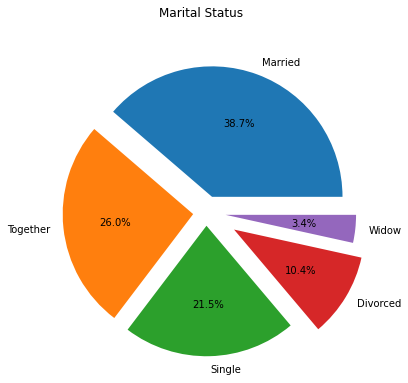

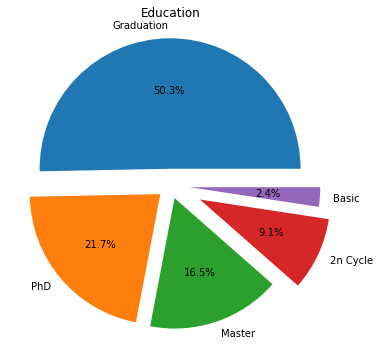

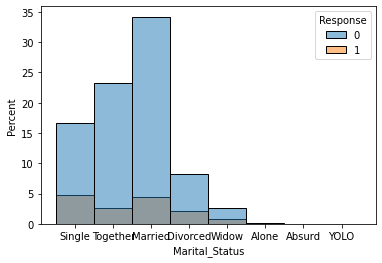

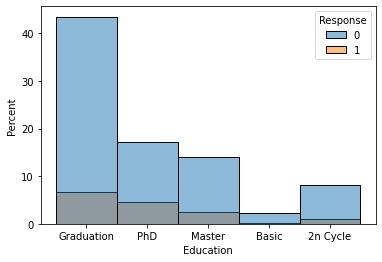

In [8]:
#task 6
ms_df_c = df["Marital_Status"].value_counts().to_frame()
ms_df = ms_df_c[ms_df_c["Marital_Status"] > 50]
ed_df = df["Education"].value_counts().to_frame()

ms_df[ms_df["Marital_Status"] > 50].plot(
    kind='pie',
    autopct='%1.1f%%',
    legend=None,
    ylabel="",
    subplots=True,
    shadow=False,
    explode=(0.13, 0.1, 0.1, 0.25, 0.15),
    title="Marital Status",
    figsize = (6,6)
)
plt.show()

ed_df.plot(
    y="Education",
    kind='pie',
    autopct='%1.1f%%',
    legend=None,
    ylabel="",
    shadow=False,
    explode=(0.13, 0.1, 0.1, 0.25, 0.15),
    title="Education",
    figsize = (6,6)

)
plt.show()

sns.histplot(data=df, x="Marital_Status", stat='percent', hue="Response")
plt.show()
sns.histplot(data=df, x="Education", stat='percent', hue="Response")
plt.show()

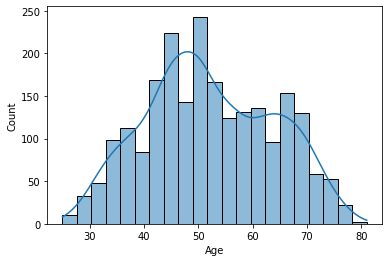

In [9]:
#task 7
def calculate_age(born) -> int:
    return int(datetime.today().strftime("%Y")) - int(born)

df["Age"] = df["Age"].apply(calculate_age)
filtered_df = df[df["Age"] < 100]
sns.histplot(x=filtered_df["Age"], kde=True)
plt.show()

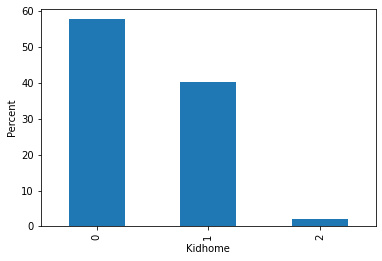

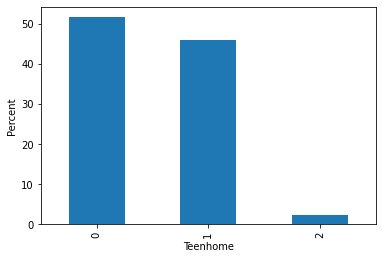

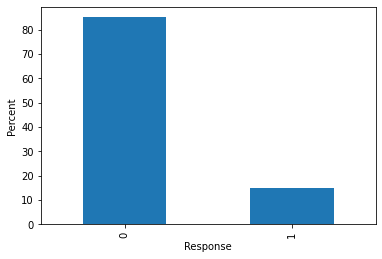

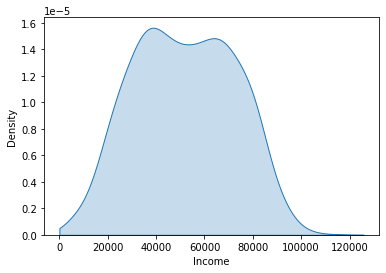

In [10]:
#task 8
def show_bar(data_name: str) -> None:
    df[data_name].value_counts(normalize=True).mul(100).to_frame().plot(
        kind='bar',
        legend=None,
        xlabel=data_name,
        ylabel="Percent"
    )
    plt.show()

show_bar("Kidhome")
show_bar("Teenhome")
show_bar("Response")
sns.kdeplot(df["Income"], shade=True, clip=(10**0, 10**5.1))
plt.show()

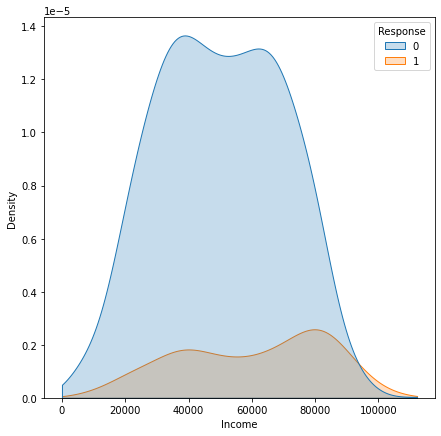

C:\Users\wwwmi\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


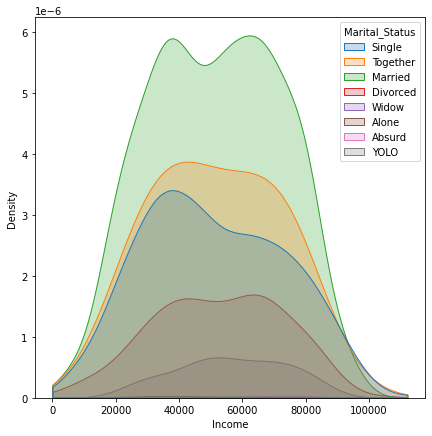

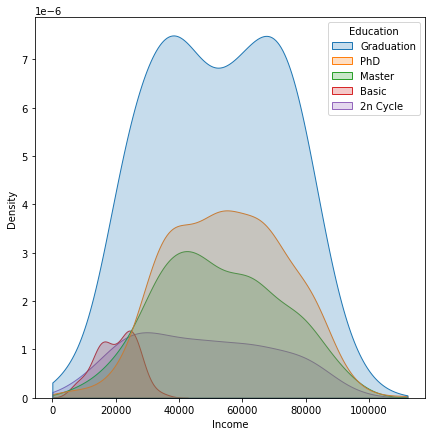

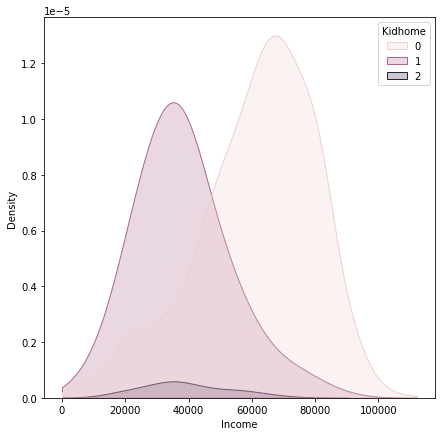

In [11]:
#task 9
def show_kde(hue: str, clip: tuple = (10**0, 10**5.05)):
    plt.figure(figsize = (7, 7))
    sns.kdeplot(data=df, x="Income", hue=hue, shade=True, clip=clip)
    plt.show()


show_kde("Response")
show_kde("Marital_Status")
show_kde("Education")
show_kde("Kidhome")

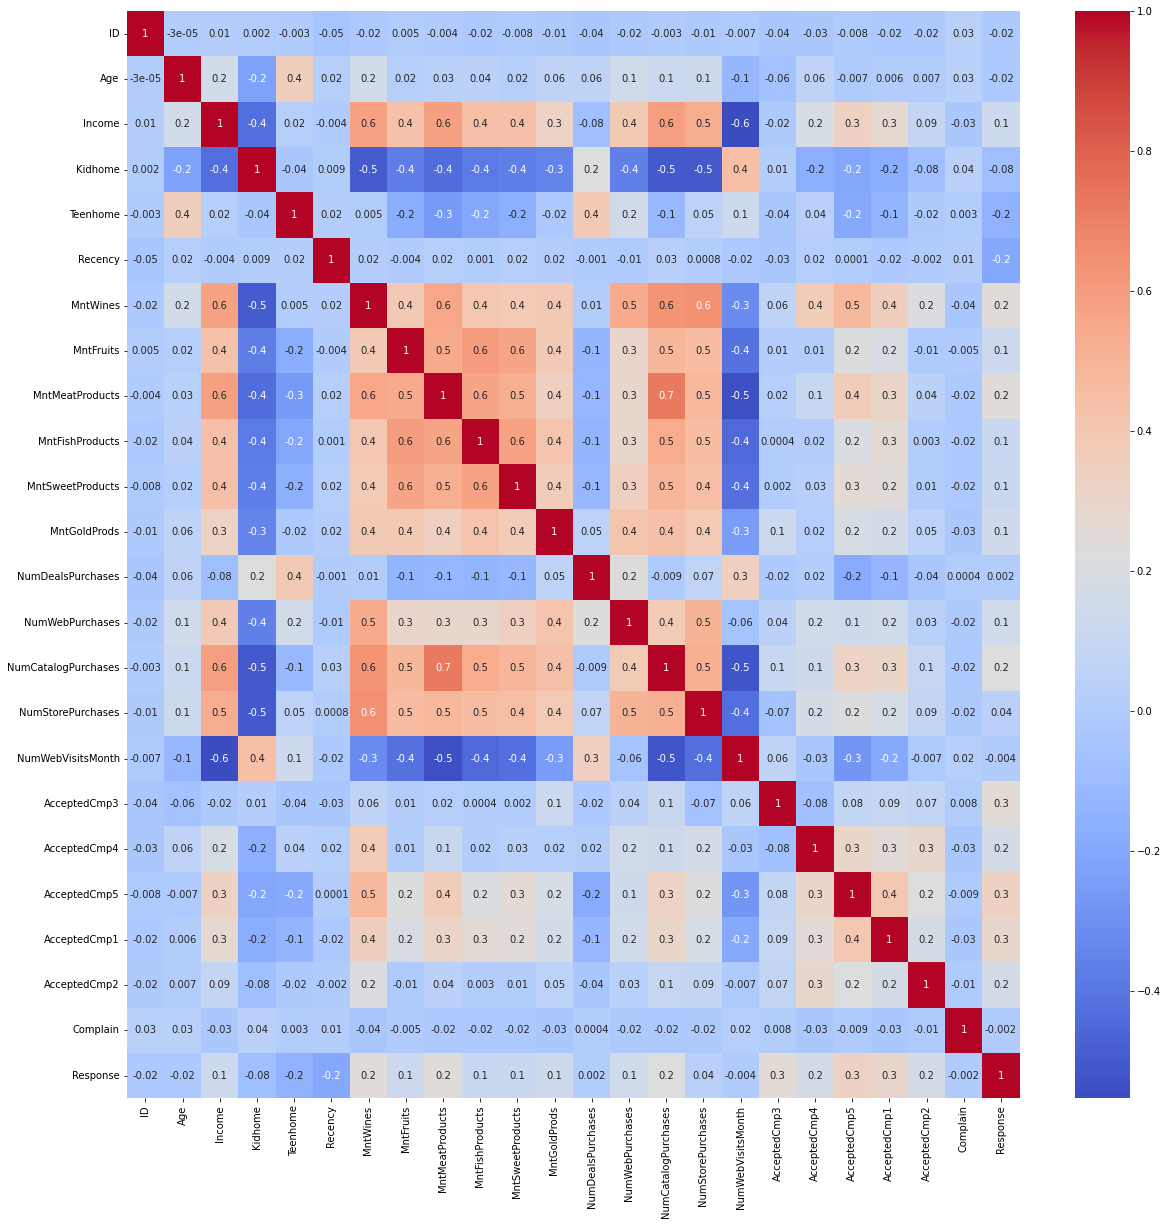

In [12]:
#task 10
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
plt.figure(figsize = (20,20))
sns.heatmap(newdf.corr(), cmap='coolwarm', annot=True, fmt='.1g')
plt.show()